#Packages and Functions

In [2]:
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from google.colab import drive
from sklearn.metrics import precision_recall_curve, average_precision_score, recall_score

drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')

In [4]:
def data_extraction(classifier):
    # Table path for the given classifier
    table_path = f'/content/drive/MyDrive/Project/test_pred_conf_classifier{classifier}.csv'
    # Read the table
    test_table = pd.read_csv(table_path)

    # Training accuracy list path for the given classifier
    train_acc_path = f'/content/drive/MyDrive/Project/Accuracy CSVs/train_acc_list_c{classifier}.csv'
    # Read the training accuracy list
    with open(train_acc_path, 'r') as file:
        reader = csv.reader(file)
        train_acc_list = list(reader)

    # Validation accuracy list path for the given classifier
    val_acc_path = f'/content/drive/MyDrive/Project/Accuracy CSVs/val_acc_list_c{classifier}.csv'
    # Read the validation accuracy list
    with open(val_acc_path, 'r') as file:
        reader = csv.reader(file)
        val_acc_list = list(reader)

    # Flatten and convert to float
    train_acc_list = [float(item) for sublist in train_acc_list for item in sublist]
    val_acc_list = [float(item) for sublist in val_acc_list for item in sublist]

    return test_table, train_acc_list, val_acc_list

In [5]:
def data_extraction_old(classifier):
    # Table path for the given classifier
    table_path = f'/content/drive/MyDrive/Project/testdata_predictions_table_classifier{classifier}.csv'
    # Read the table
    test_table = pd.read_csv(table_path)

    # Training accuracy list path for the given classifier
    train_acc_path = f'/content/drive/MyDrive/Project/Accuracy CSVs/train_acc_list_c{classifier}.csv'
    # Read the training accuracy list
    with open(train_acc_path, 'r') as file:
        reader = csv.reader(file)
        train_acc_list = list(reader)

    # Validation accuracy list path for the given classifier
    val_acc_path = f'/content/drive/MyDrive/Project/Accuracy CSVs/val_acc_list_c{classifier}.csv'
    # Read the validation accuracy list
    with open(val_acc_path, 'r') as file:
        reader = csv.reader(file)
        val_acc_list = list(reader)

    # Flatten and convert to float
    train_acc_list = [float(item) for sublist in train_acc_list for item in sublist]
    val_acc_list = [float(item) for sublist in val_acc_list for item in sublist]

    return test_table, train_acc_list, val_acc_list

In [6]:
def plot_pr_curve(classifier_name):
    # Load the test data for the given classifier
    test_data_path = f'/content/drive/MyDrive/Project/test_pred_conf_classifier{classifier_name}.csv'
    test_table = pd.read_csv(test_data_path)

    # Create a binary label: True if predicted_class equals target_class, False otherwise
    test_table['correct'] = test_table['predicted_class'] == test_table['target_class']

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(test_table['correct'], test_table['confidence'])
    avg_precision = average_precision_score(test_table['correct'], test_table['confidence'])

    # Plot the precision-recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, lw=2, label=f'Average Precision = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Classifier {classifier_name} - Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

In [7]:
def plot_confusion_matrix(classifier_name):
    # Load the test data for the given classifier
    test_data_path = f'/content/drive/MyDrive/Project/test_pred_conf_classifier{classifier_name}.csv'
    test_table = pd.read_csv(test_data_path)

    # Compute the confusion matrix
    cm = confusion_matrix(test_table['target_class'], test_table['predicted_class'], normalize='pred')

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(cm, display_labels=test_table['target_class'].unique())
    disp.plot(include_values=False, xticks_rotation='vertical', cmap='RdBu')

    # Customize the confusion matrix display
    disp.ax_.set_xlabel('Predicted Label')
    disp.ax_.set_ylabel('True Label')
    disp.ax_.set_title(f'Confusion Matrix - Classifier {classifier_name}')

    # Show the plot
    plt.show()

In [8]:
def kappa(classifier):
  # Table path for the given classifier
  table_path = f'/content/drive/MyDrive/Project/test_pred_conf_classifier{classifier}.csv'
  # Read the table
  test_table = pd.read_csv(table_path)

  kappa = cohen_kappa_score(test_table['target_class'], test_table['predicted_class'])
  print(f'Cohen Kappa Score Classifier {classifier}: {kappa: .3f}')

  return kappa

In [9]:
def plot_species_accuracy(classifier_number):
    # Load the data for the given classifier
    data_path = f'/content/drive/MyDrive/Project/test_pred_conf_classifier{classifier_number}.csv'
    test_data = pd.read_csv(data_path)

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(test_data['predicted_class'], test_data['target_class'])
    print(f'Overall Accuracy for Classifier {classifier_number}: {overall_accuracy:.3f}')

    # Calculate accuracy for each species
    species_accuracy = {}
    species_names = test_data['target_class'].unique()
    for species in species_names:
        species_df = test_data[test_data['target_class'] == species]
        accuracy = accuracy_score(species_df['target_class'], species_df['predicted_class'])
        species_accuracy[species] = accuracy

    # Plot bar chart showing accuracy for each species
    plt.bar(list(species_accuracy.keys()), list(species_accuracy.values()), color='steelblue')
    plt.xlabel('Species')
    plt.ylabel('Accuracy')
    plt.title(f'Classifier {classifier_number} - Per Species Accuracy')
    plt.xticks(rotation=90)
    plt.show()

In [10]:
def get_f1_score(classifier_number):
    # Load the test data for the given classifier
    data_path = f'/content/drive/MyDrive/Project/test_pred_conf_classifier{classifier_number}.csv'
    test_data = pd.read_csv(data_path)

    # Calculate the F1 score
    # Use 'weighted' averaging to account for different class sizes
    f1 = f1_score(test_data['target_class'], test_data['predicted_class'], average='weighted')

    print(f'F-1 Score Classifier {classifier_number}: {f1: .3f}')

    return f1  # Return the F1 score

In [11]:
def get_avg_precision_recall(classifier_number):
    # Load the test data for the given classifier
    data_path = f'/content/drive/MyDrive/Project/test_pred_conf_classifier{classifier_number}.csv'
    test_data = pd.read_csv(data_path)

    # Compute the binary correctness label: True if predicted class matches target class, False otherwise
    test_data['correct'] = test_data['predicted_class'] == test_data['target_class']

    # Compute precision-recall curve and average precision
    precision, recall, _ = precision_recall_curve(test_data['correct'], test_data['confidence'])
    avg_precision = average_precision_score(test_data['correct'], test_data['confidence'], average='micro')
    avg_recall = recall_score(test_data['target_class'], test_data['predicted_class'], average='micro')

    # Print the results
    print(f'Average Precision for Classifier {classifier_number}: {avg_precision:.3f}')
    print(f'Average Recall for Classifier {classifier_number}: {avg_recall:.3f}')

    # Return the average precision and average recall
    return avg_precision, avg_recall

In [12]:
def get_f1_scores_per_class(classifier_number, label_order):
    # Load the test data for the given classifier
    data_path = f'/content/drive/MyDrive/Project/test_pred_conf_classifier{classifier_number}.csv'
    test_data = pd.read_csv(data_path)

    # Calculate F1 score for each class
    f1_scores = {}
    for label in label_order:
        # Filter rows for the specific class
        class_data = test_data[test_data['target_class'] == label]

        # Calculate the F1 score for the current class
        if not class_data.empty:
            f1 = f1_score(class_data['target_class'], class_data['predicted_class'], labels=label, average='micro')
            f1_scores[label] = f1
        else:
            f1_scores[label] = None  # If the class isn't in the test data, return None

    return f1_scores  # Return the F1 scores dictionary in the specified order

In [13]:
def get_label_order_by_count(classifier_number):
    # Load the test data for the given classifier
    data_path = f'/content/drive/MyDrive/Project/test_pred_conf_classifier{classifier_number}.csv'
    test_data = pd.read_csv(data_path)

    # Count the number of entries for each class in the 'target_class'
    class_counts = test_data['target_class'].value_counts()

    # Get the list of class labels in order from most populated to least
    label_order = class_counts.index.tolist()

    return label_order  # Return the ordered list of class labels

label_order = get_label_order_by_count('10b')

In [14]:
def accuracy_per_class(classifier_number, label_order):

    data_path = f'/content/drive/MyDrive/Project/test_pred_conf_classifier{classifier_number}.csv'
    test_data = pd.read_csv(data_path)
    accuracy_scores = {}
    for label in label_order:

      class_data = test_data[test_data['target_class'] == label]
      correct_counter = 0

      for index, row in class_data.iterrows():
        if row['target_class'] == row['predicted_class']:
          correct_counter += 1

      accuracy = correct_counter/len(class_data)
      accuracy_scores[label] = accuracy

    return(accuracy_scores)

In [15]:
def max_train_val_test(classifier):
  data_path = f'/content/drive/MyDrive/Project/test_pred_conf_classifier{classifier}.csv'
  test_data = pd.read_csv(data_path)

  train_acc_path = f'/content/drive/MyDrive/Project/Accuracy CSVs/train_acc_list_c{classifier}.csv'
  # Read the training accuracy list
  with open(train_acc_path, 'r') as file:
      reader = csv.reader(file)
      train_acc_list = list(reader)

  # Validation accuracy list path for the given classifier
  val_acc_path = f'/content/drive/MyDrive/Project/Accuracy CSVs/val_acc_list_c{classifier}.csv'
  # Read the validation accuracy list
  with open(val_acc_path, 'r') as file:
      reader = csv.reader(file)
      val_acc_list = list(reader)

    # Flatten and convert to float
  train_acc_list = [float(item) for sublist in train_acc_list for item in sublist]
  val_acc_list = [float(item) for sublist in val_acc_list for item in sublist]

  train_max = np.max(train_acc_list)
  val_max = np.max(val_acc_list)
  test_acc = accuracy_score(test_data['predicted_class'], test_data['target_class'])

  results = {
        'train_max': train_max,
        'val_max': val_max,
        'test_acc': test_acc
    }

  return results

#Test Set Evaluations

#Data Loading

In [112]:
test_table_c4, train_acc_list_c4, val_acc_list_c4 = data_extraction_old('4')

In [113]:
test_table_c6, train_acc_list_c6, val_acc_list_c6 = data_extraction_old('6')

In [114]:
test_table_c7b, train_acc_list_c7b, val_acc_list_c7b = data_extraction_old('7b')

In [115]:
test_table_c8b, train_acc_list_c8b, val_acc_list_c8b = data_extraction('8b')

In [116]:
test_table_c9, train_acc_list_c9, val_acc_list_c9 = data_extraction('9')

In [117]:
test_table_c10b, train_acc_list_c10b, val_acc_list_c10b = data_extraction('10b')

In [118]:
test_table_c11, train_acc_list_c11, val_acc_list_c11 = data_extraction('11')

In [119]:
test_table_c12, train_acc_list_c12, val_acc_list_c12 = data_extraction('12')

In [120]:
test_table_c13, train_acc_list_c13, val_acc_list_c13 = data_extraction('13')

In [121]:
test_table_c14, train_acc_list_c14, val_acc_list_c14 = data_extraction('14')

In [122]:
test_table_c15, train_acc_list_c15, val_acc_list_c15 = data_extraction('15')

In [123]:
test_table_c16, train_acc_list_c16, val_acc_list_c16 = data_extraction('16')

In [124]:
test_table_c17, train_acc_list_c17, val_acc_list_c17 = data_extraction('17')

#Analysis

#P-R Curves

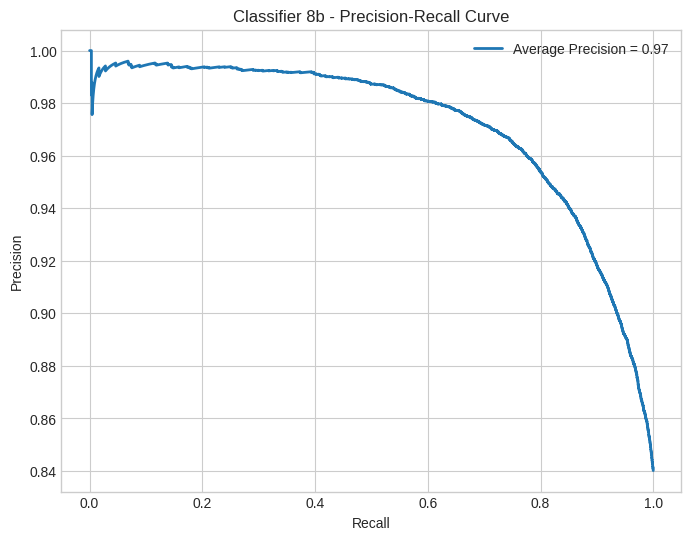

In [ ]:
plot_pr_curve('8b')

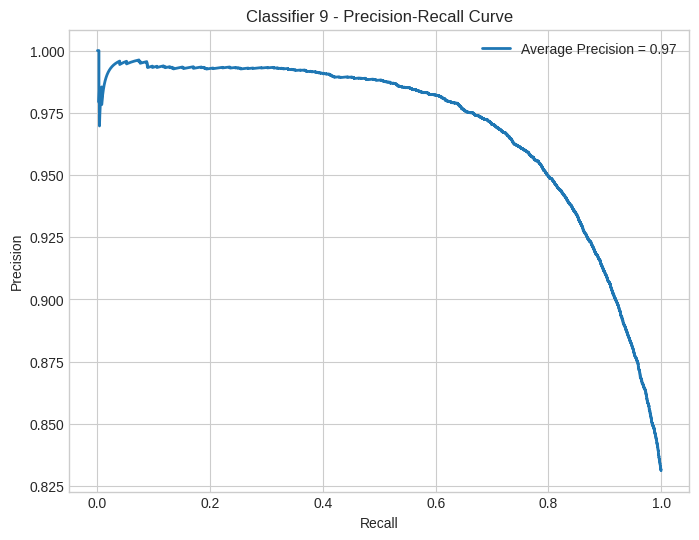

In [ ]:
plot_pr_curve('9')

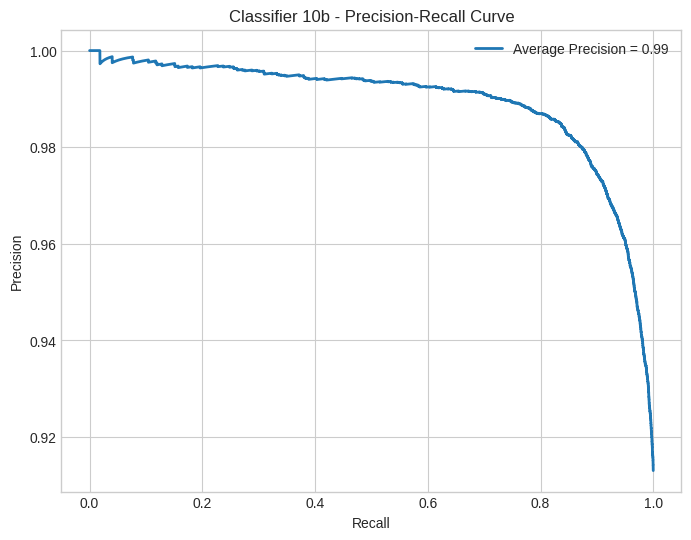

In [ ]:
plot_pr_curve('10b')

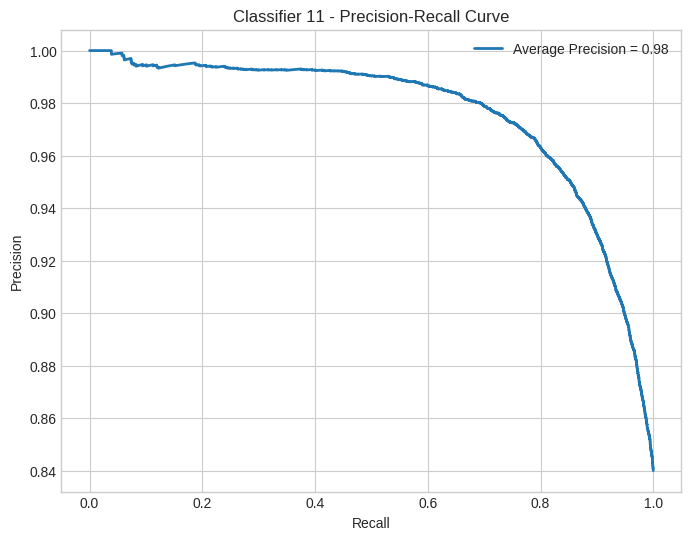

In [ ]:
plot_pr_curve('11')

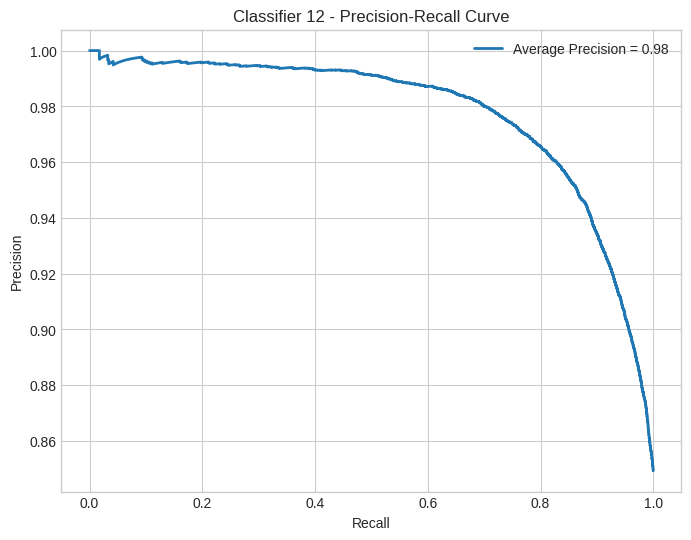

In [ ]:
plot_pr_curve('12')

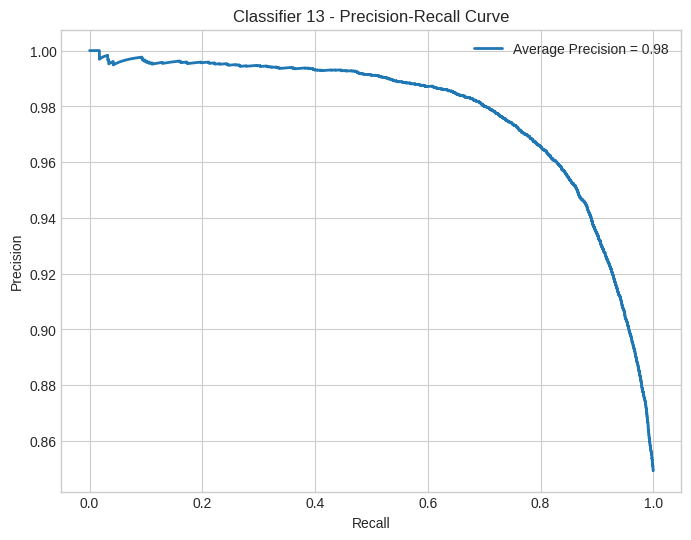

In [ ]:
plot_pr_curve('13')

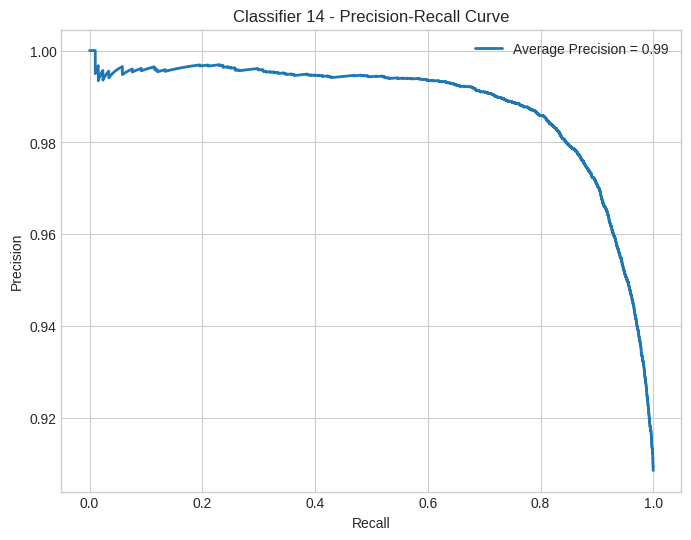

In [ ]:
plot_pr_curve('14')

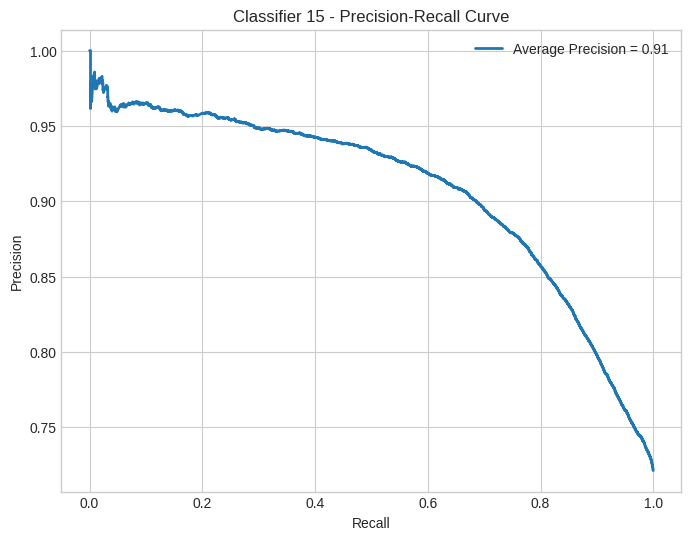

In [ ]:
plot_pr_curve('15')

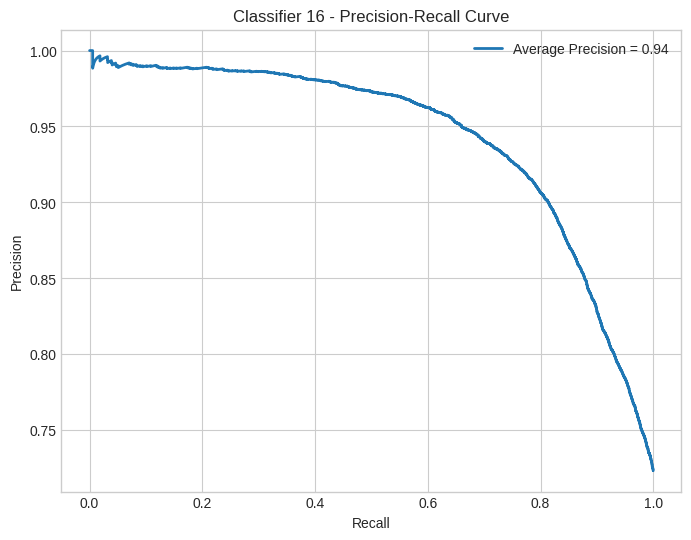

In [ ]:
plot_pr_curve('16')

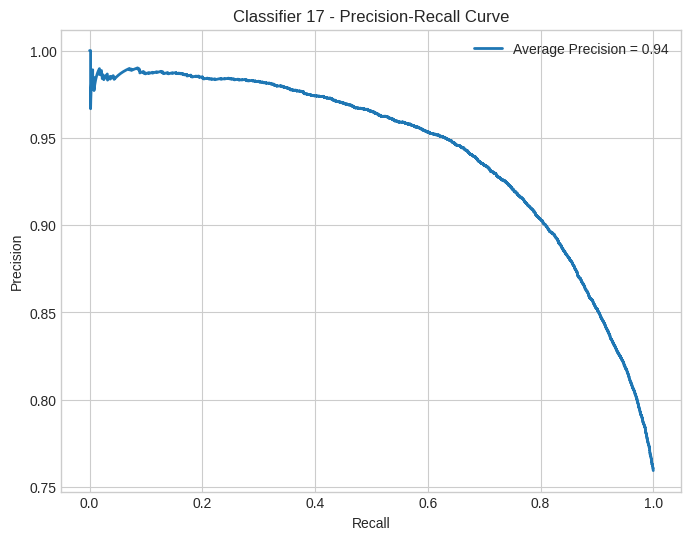

In [ ]:
plot_pr_curve('17')

#Confusion Matrices

In [ ]:
plt.style.use('default')

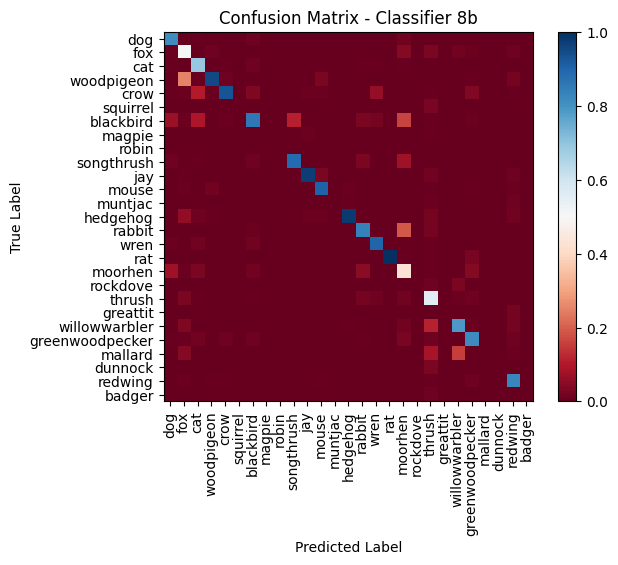

In [ ]:
plot_confusion_matrix('8b')

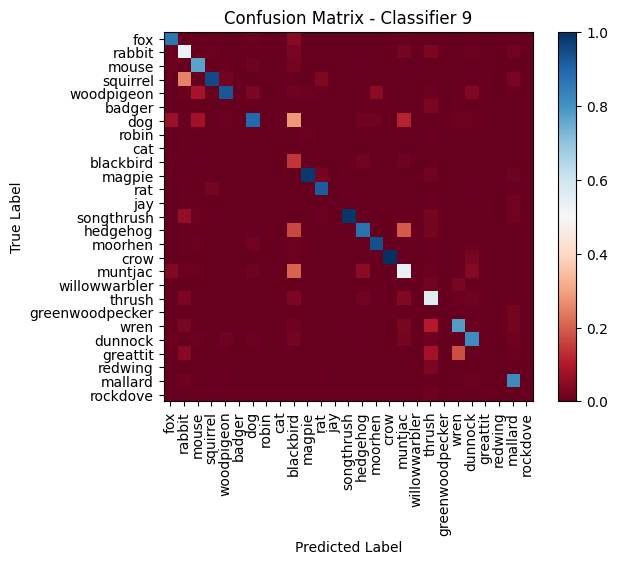

In [ ]:
plot_confusion_matrix('9')

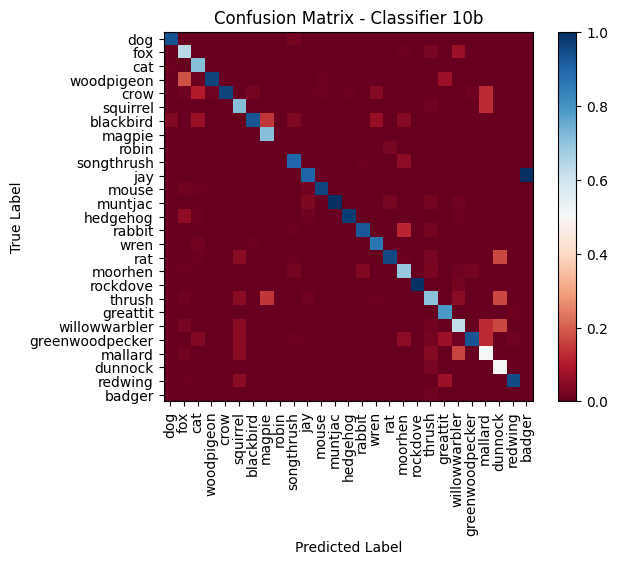

In [ ]:
plot_confusion_matrix('10b')

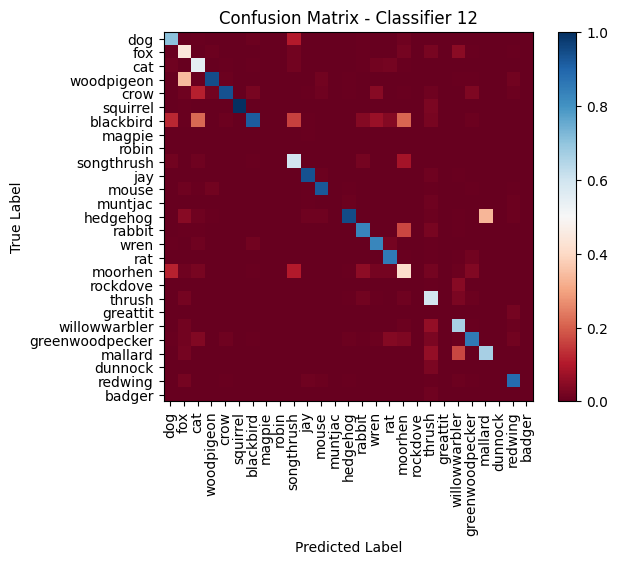

In [ ]:
plot_confusion_matrix('12')

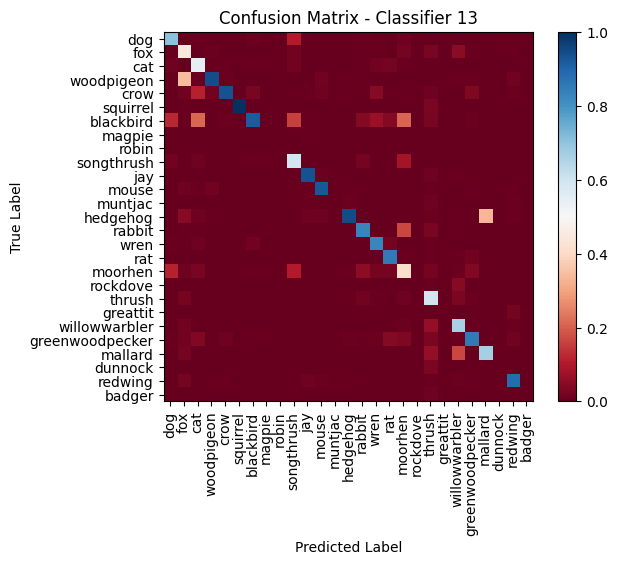

In [ ]:
plot_confusion_matrix('13')

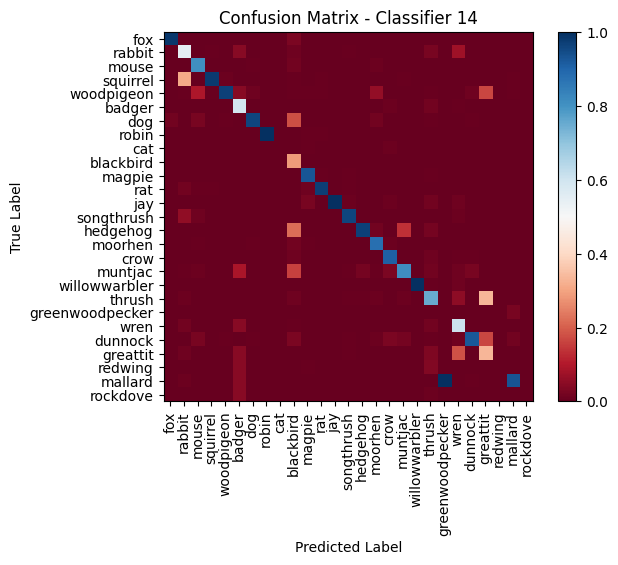

In [ ]:
plot_confusion_matrix('14')

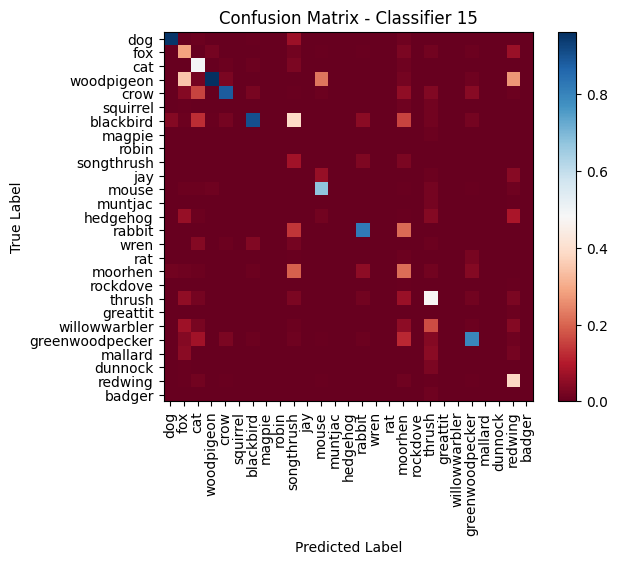

In [ ]:
plot_confusion_matrix('15')

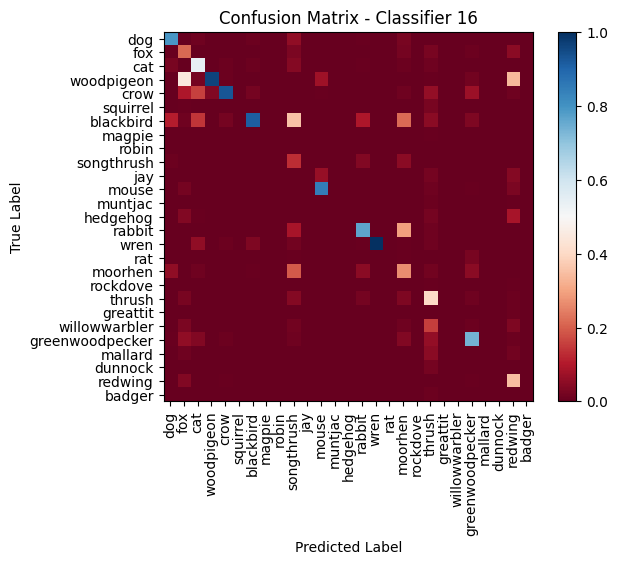

In [ ]:
plot_confusion_matrix('16')

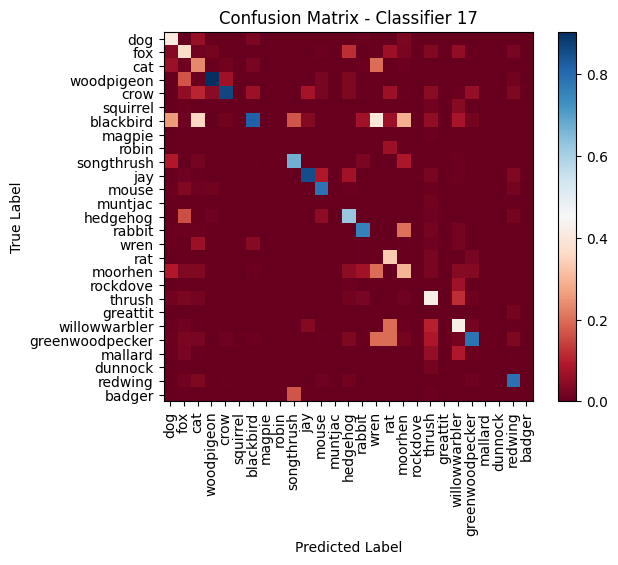

In [ ]:
plot_confusion_matrix('17')

#Kappa Statistics

In [ ]:
kappa_c8b = kappa('8b')

Cohen Kappa Score Classifier 8b:  0.809


In [ ]:
kappa_c9 = kappa('9')

Cohen Kappa Score Classifier 9:  0.799


In [ ]:
kappa_c10b = kappa('10b')

Cohen Kappa Score Classifier 10b:  0.897


In [ ]:
kappa_c9 = kappa('11')

Cohen Kappa Score Classifier 11:  0.812


In [ ]:
kappa_c9 = kappa('12')

Cohen Kappa Score Classifier 12:  0.821


In [ ]:
kappa_c9 = kappa('13')

Cohen Kappa Score Classifier 13:  0.821


In [ ]:
kappa_c9 = kappa('14')

Cohen Kappa Score Classifier 14:  0.892


In [ ]:
kappa_c9 = kappa('15')

Cohen Kappa Score Classifier 15:  0.670


In [ ]:
kappa_c9 = kappa('16')

Cohen Kappa Score Classifier 16:  0.672


In [ ]:
kappa_c9 = kappa('17')

Cohen Kappa Score Classifier 17:  0.713


#Per Species Accuracy Bar Charts

Overall Accuracy for Classifier 8b: 0.840


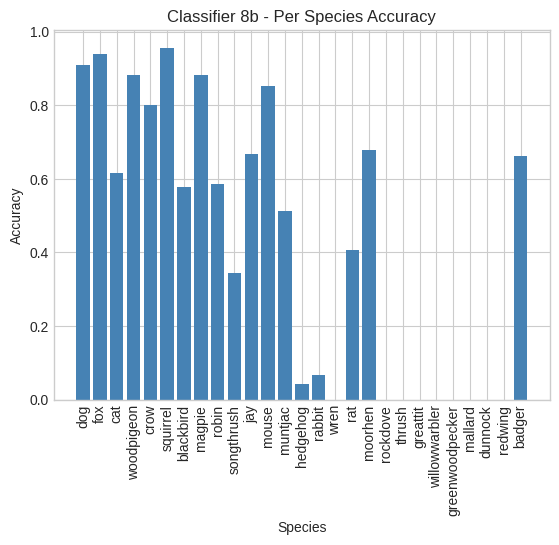

In [ ]:
plot_species_accuracy('8b')

Overall Accuracy for Classifier 9: 0.831


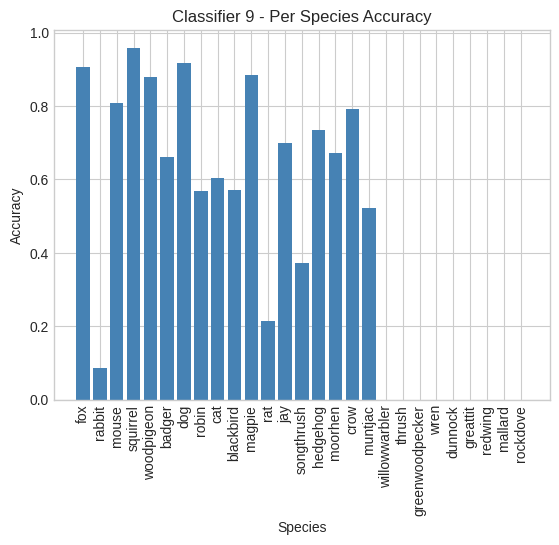

In [ ]:
plot_species_accuracy('9')

Overall Accuracy for Classifier 10b: 0.913


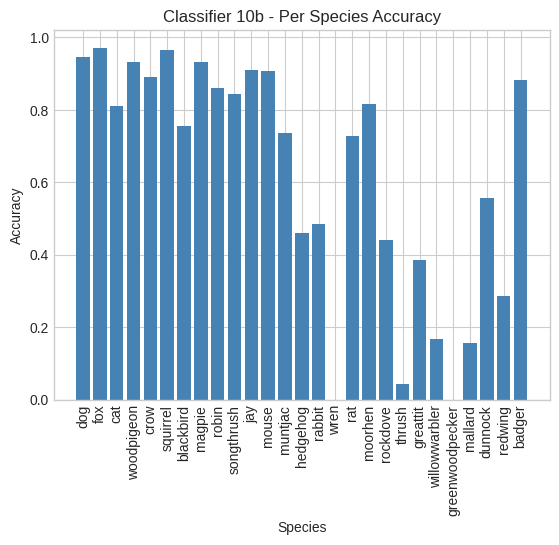

In [ ]:
plot_species_accuracy('10b')

Overall Accuracy for Classifier 11: 0.840


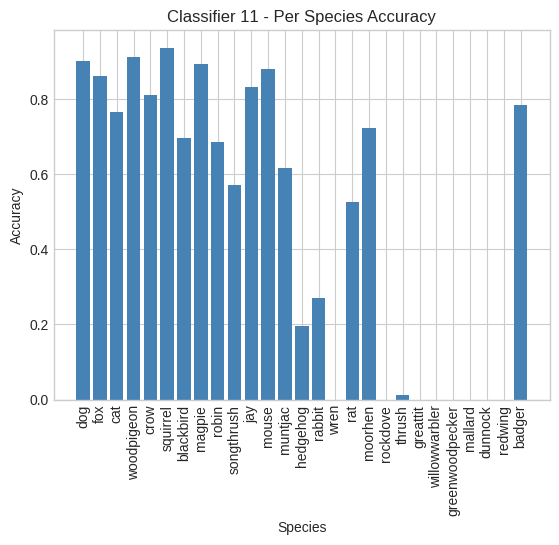

In [ ]:
plot_species_accuracy('11')

Overall Accuracy for Classifier 12: 0.849


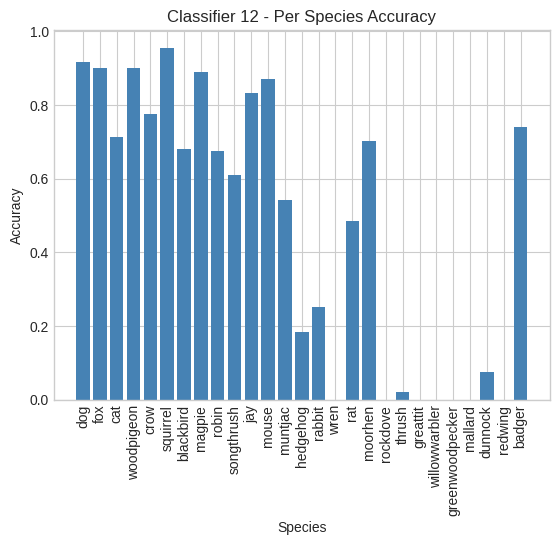

In [ ]:
plot_species_accuracy('12')

Overall Accuracy for Classifier 13: 0.849


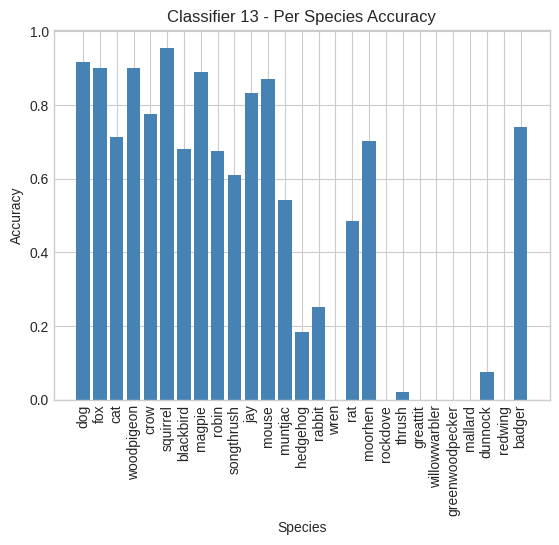

In [ ]:
plot_species_accuracy('13')

Overall Accuracy for Classifier 14: 0.909


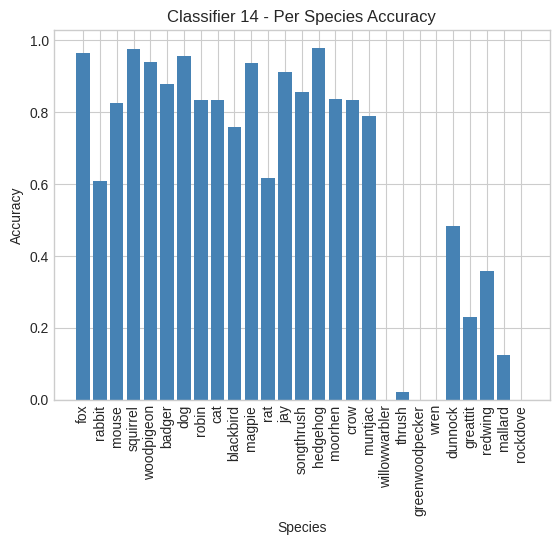

In [ ]:
plot_species_accuracy('14')

Overall Accuracy for Classifier 15: 0.721


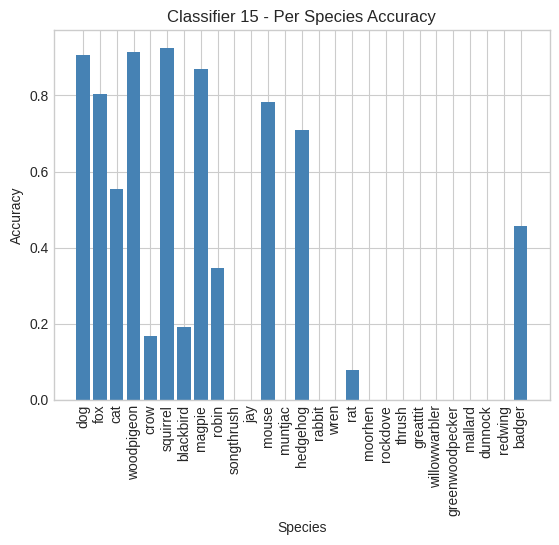

In [ ]:
plot_species_accuracy('15')

Overall Accuracy for Classifier 16: 0.723


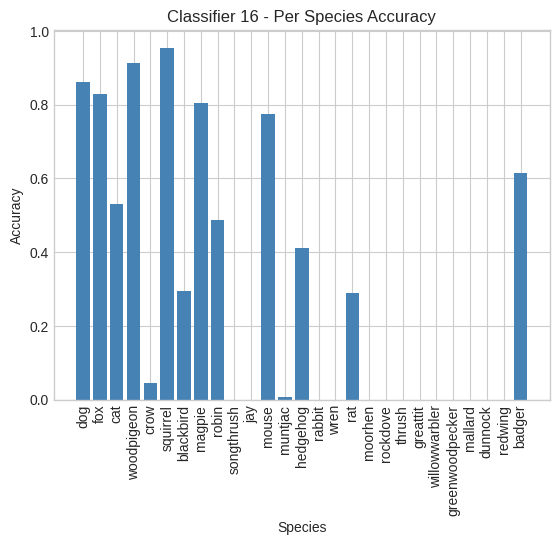

In [ ]:
plot_species_accuracy('16')

Overall Accuracy for Classifier 17: 0.759


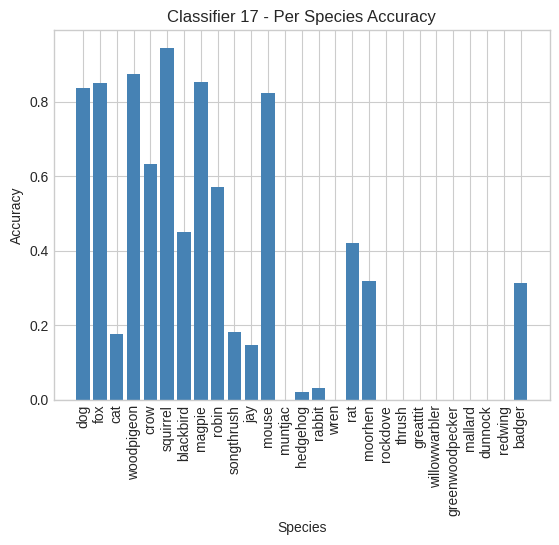

In [ ]:
plot_species_accuracy('17')

#F-1 Scores

In [ ]:
f1_8b = get_f1_score('8b')

F-1 Score Classifier 8b:  0.827


In [ ]:
f1_9 = get_f1_score('9')

F-1 Score Classifier 9:  0.827


In [ ]:
f1_10b = get_f1_score('10b')

F-1 Score Classifier 10b:  0.910


In [ ]:
f1_11 = get_f1_score('11')

F-1 Score Classifier 11:  0.839


In [ ]:
f1_12 = get_f1_score('12')

F-1 Score Classifier 12:  0.844


In [ ]:
f1_13 = get_f1_score('13')

F-1 Score Classifier 13:  0.844


In [ ]:
f1_14 = get_f1_score('14')

F-1 Score Classifier 14:  0.910


In [ ]:
f1_15 = get_f1_score('15')

F-1 Score Classifier 15:  0.705


In [ ]:
f1_16 = get_f1_score('16')

F-1 Score Classifier 16:  0.699


In [ ]:
f1_17 = get_f1_score('17')

F-1 Score Classifier 17:  0.741


#Architecture Exploration Figures

In [ ]:
test_table_c3 = pd.read_csv('/content/drive/MyDrive/Project/testdata_predictions_table_classifier3.csv')

In [ ]:
f1 = f1_score(test_table_c3['Test_Targets'], test_table_c3['Test_Predictions'], average='weighted')

print(f1)

0.7291089549847278


In [ ]:
f1 = f1_score(test_table_c4['Test_Targets'], test_table_c4['Test_Predictions'], average='weighted')

print(f1)

0.7547747144679541


In [ ]:
f1 = f1_score(test_table_c6['Test_Targets'], test_table_c6['Test_Predictions'], average='weighted')

print(f1)

0.8663179708277622


In [ ]:
f1 = f1_score(test_table_c7b['Test_Targets'], test_table_c7b['Test_Predictions'], average='weighted')

print(f1)

0.9326602132153823


In [ ]:
val_max = np.max(val_acc_list_c4)

print(val_max)

0.7813932468203241


In [ ]:
val_max = np.max(val_acc_list_c6)

print(val_max)

0.8753308799793402


In [ ]:
val_max = np.max(val_acc_list_c7b)

print(val_max)

0.933113822712893


#Average Precision and Average Recall

In [ ]:
avg_precision_8b, avg_recall_8b = get_avg_precision_recall('8b')

Average Precision for Classifier 8b: 0.971
Average Recall for Classifier 8b: 0.840


In [ ]:
avg_precision_9, avg_recall_9 = get_avg_precision_recall('9')

Average Precision for Classifier 9: 0.969
Average Recall for Classifier 9: 0.831


In [ ]:
avg_precision_10b, avg_recall_10b = get_avg_precision_recall('10b')

Average Precision for Classifier 10b: 0.989
Average Recall for Classifier 10b: 0.913


In [ ]:
avg_precision_11, avg_recall_11 = get_avg_precision_recall('11')

Average Precision for Classifier 11: 0.976
Average Recall for Classifier 11: 0.840


In [ ]:
avg_precision_12, avg_recall_12 = get_avg_precision_recall('12')

Average Precision for Classifier 12: 0.978
Average Recall for Classifier 12: 0.849


In [ ]:
avg_precision_13, avg_recall_13 = get_avg_precision_recall('13')

Average Precision for Classifier 13: 0.978
Average Recall for Classifier 13: 0.849


In [ ]:
avg_precision_14, avg_recall_14 = get_avg_precision_recall('14')

Average Precision for Classifier 14: 0.988
Average Recall for Classifier 14: 0.909


In [ ]:
avg_precision_16, avg_recall_16 = get_avg_precision_recall('16')

Average Precision for Classifier 16: 0.943
Average Recall for Classifier 16: 0.723


In [ ]:
avg_precision_17, avg_recall_17 = get_avg_precision_recall('17')

Average Precision for Classifier 17: 0.942
Average Recall for Classifier 17: 0.759


#Per Species Line Graphs

**F-1 Score**

In [28]:
f1_scores_8b = get_f1_scores_per_class('8b', label_order)

for label, score in f1_scores_8b.items():
  print(f'{label, {score}}')

('fox', {0.9669749009247026})
('dog', {0.9518953668809577})
('squirrel', {0.9603751465416177})
('mouse', {0.9034719572682183})
('crow', {0.8285345938977224})
('woodpigeon', {0.8813953488372092})
('rat', {0.5655577299412916})
('magpie', {0.9076923076923077})
('robin', {0.6864784546805349})
('cat', {0.7243243243243244})
('blackbird', {0.6355475763016158})
('badger', {0.6617915904936016})
('muntjac', {0.5182341650671785})
('moorhen', {0.7316017316017316})
('songthrush', {0.3432203389830508})
('hedgehog', {0.043243243243243246})
('rabbit', {0.10679611650485438})
('jay', {0.7878787878787878})
('thrush', {0.0})
('mallard', {0.0})
('dunnock', {0.0})
('rockdove', {0.0})
('willowwarbler', {0.0})
('redwing', {0.0})
('greattit', {0.0})
('wren', {0.0})
('greenwoodpecker', {0.0})


In [29]:
f1_scores_9 = get_f1_scores_per_class('9', label_order)

In [30]:
f1_scores_10b = get_f1_scores_per_class('10b', label_order)

for label, score in f1_scores_10b.items():
  print(f'{label, {score}}')

('fox', {0.9843937575030012})
('dog', {0.9670639219934994})
('squirrel', {0.9730302673418914})
('mouse', {0.9436936936936936})
('crow', {0.8997062526227444})
('woodpigeon', {0.9462492616656822})
('rat', {0.8379254457050244})
('magpie', {0.9452401010951981})
('robin', {0.9078771695594126})
('cat', {0.8589951377633711})
('blackbird', {0.8013816925734024})
('badger', {0.8832116788321168})
('muntjac', {0.7376425855513309})
('moorhen', {0.8302658486707567})
('songthrush', {0.8486140724946696})
('hedgehog', {0.4594594594594595})
('rabbit', {0.5962264150943396})
('jay', {0.9435215946843852})
('thrush', {0.0446927374301676})
('mallard', {0.15625})
('dunnock', {0.5555555555555556})
('rockdove', {0.44})
('willowwarbler', {0.16666666666666666})
('redwing', {0.2857142857142857})
('greattit', {0.38461538461538464})
('wren', {0.0})
('greenwoodpecker', {0.0})


In [31]:
f1_scores_12 = get_f1_scores_per_class('12', label_order)

In [32]:
f1_scores_14 = get_f1_scores_per_class('14', label_order)

for label, score in f1_scores_14.items():
  print(f'{label, {score}}')

('fox', {0.9802188974796666})
('dog', {0.972687034438087})
('squirrel', {0.9774912075029307})
('mouse', {0.8521415270018623})
('crow', {0.8409567771716324})
('woodpigeon', {0.9539551357733176})
('rat', {0.7584415584415584})
('magpie', {0.9478991596638655})
('robin', {0.8867924528301886})
('cat', {0.8540031397174255})
('blackbird', {0.823321554770318})
('badger', {0.8759124087591241})
('muntjac', {0.7923809523809524})
('moorhen', {0.8489795918367348})
('songthrush', {0.8559322033898306})
('hedgehog', {0.9783783783783784})
('rabbit', {0.7071428571428571})
('jay', {0.9466666666666667})
('thrush', {0.0380952380952381})
('mallard', {0.12903225806451615})
('dunnock', {0.48148148148148145})
('rockdove', {0.0})
('willowwarbler', {0.0})
('redwing', {0.35714285714285715})
('greattit', {0.23076923076923078})
('wren', {0.0})
('greenwoodpecker', {0.0})


In [33]:
f1_scores_16 = get_f1_scores_per_class('16', label_order)

In [49]:
f1_scores_17 = get_f1_scores_per_class('17', label_order)

In [34]:
f1_dicts = [f1_scores_10b, f1_scores_8b, f1_scores_12, f1_scores_14, f1_scores_16]

In [35]:
classifiers_list_plot = ['Whole Dataset - FT', 'Whole Dataset - FFE', 'Under-sample 1 - FFE', 'Oversample - FT', 'Combination - FFE']

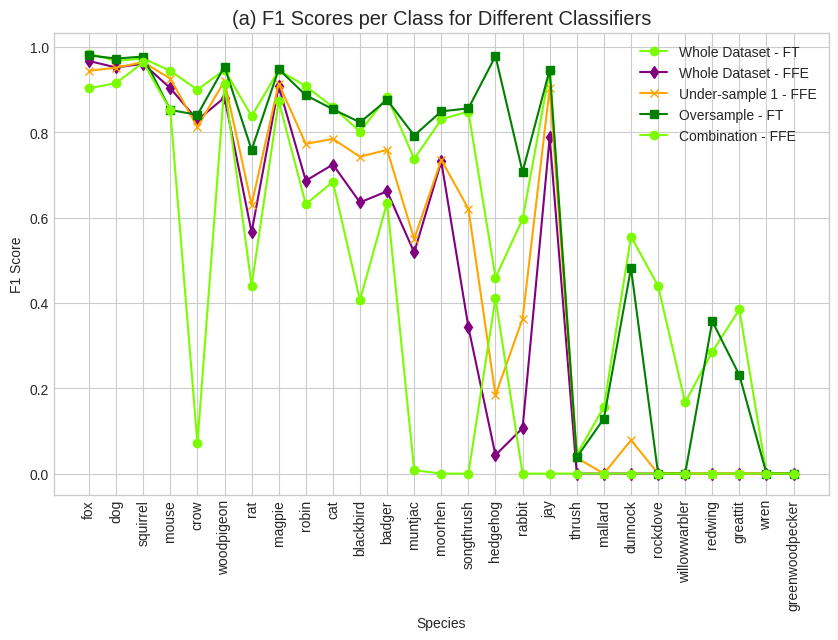

In [36]:
labels = list(f1_dicts[0].keys())  # Assuming all dictionaries have the same keys

# Create a color map with four distinct colors
colors = ['lawngreen','purple', 'orange', 'green', 'red']

# Create a list of four unique markers
markers = ['o', 'd', 'x', 's', 'd']

# Plot with unique lines, colors, and markers
plt.figure(figsize=(10, 6))

for i, f1_dict in enumerate(f1_dicts):
    # Get the F1 scores for the current dictionary
    f1_scores = list(f1_dict.values())

    # Plot the line with a unique marker and color (using modulo to cycle through 4 distinct elements)
    plt.plot(labels, f1_scores, label=f'{classifiers_list_plot[i]}', color=colors[i % 4], marker=markers[i % 4])

# Customize the plot
plt.style.use('bmh')
plt.xlabel('Species')
plt.ylabel('F1 Score')
plt.title('(a) F1 Scores per Class for Different Classifiers')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend(loc='upper right')  # Position the legend in the upper right corner
plt.show()

**Test Accuracy**

In [37]:
accuracy_scores_10b = accuracy_per_class('10b', label_order)

for label, score in accuracy_scores_10b.items():
  print(f'{label}, {score}')

fox, 0.9713721618953604
dog, 0.9449502434893077
squirrel, 0.9645108568760214
mouse, 0.9056195965417867
crow, 0.8896265560165975
woodpigeon, 0.9313953488372093
rat, 0.726123595505618
magpie, 0.9303482587064676
robin, 0.8607594936708861
cat, 0.8103975535168195
blackbird, 0.755700325732899
badger, 0.8832116788321168
muntjac, 0.7348484848484849
moorhen, 0.8152610441767069
songthrush, 0.8432203389830508
hedgehog, 0.4594594594594595
rabbit, 0.48466257668711654
jay, 0.9102564102564102
thrush, 0.043478260869565216
mallard, 0.15625
dunnock, 0.5555555555555556
rockdove, 0.44
willowwarbler, 0.16666666666666666
redwing, 0.2857142857142857
greattit, 0.38461538461538464
wren, 0.0
greenwoodpecker, 0.0


In [38]:
accuracy_scores_8b = accuracy_per_class('8b', label_order)

In [39]:
accuracy_scores_12 = accuracy_per_class('12', label_order)

In [40]:
accuracy_scores_14 = accuracy_per_class('14', label_order)

for label, score in accuracy_scores_14.items():
  print(f'{label}, {score}')

fox, 0.9636722606120435
dog, 0.9538428964641118
squirrel, 0.9733831426570161
mouse, 0.8242074927953891
crow, 0.8315352697095436
woodpigeon, 0.9395348837209302
rat, 0.6151685393258427
magpie, 0.9353233830845771
robin, 0.8329113924050633
cat, 0.8318042813455657
blackbird, 0.758957654723127
badger, 0.8759124087591241
muntjac, 0.7878787878787878
moorhen, 0.8353413654618473
songthrush, 0.8559322033898306
hedgehog, 0.9783783783783784
rabbit, 0.6073619631901841
jay, 0.9102564102564102
thrush, 0.021739130434782608
mallard, 0.125
dunnock, 0.48148148148148145
rockdove, 0.0
willowwarbler, 0.0
redwing, 0.35714285714285715
greattit, 0.23076923076923078
wren, 0.0
greenwoodpecker, 0.0


In [41]:
accuracy_scores_13 = accuracy_per_class('13', label_order)

In [42]:
accuracy_scores_16 = accuracy_per_class('16', label_order)

In [43]:
acc_dicts = [accuracy_scores_10b, accuracy_scores_8b, accuracy_scores_12, accuracy_scores_14, accuracy_scores_16]

In [44]:
classifiers_list_plot = ['Whole Dataset - FT', 'Whole Dataset - FFE', 'Under-sample 1 - FFE', 'Oversample - FT', 'Combination - FFE']

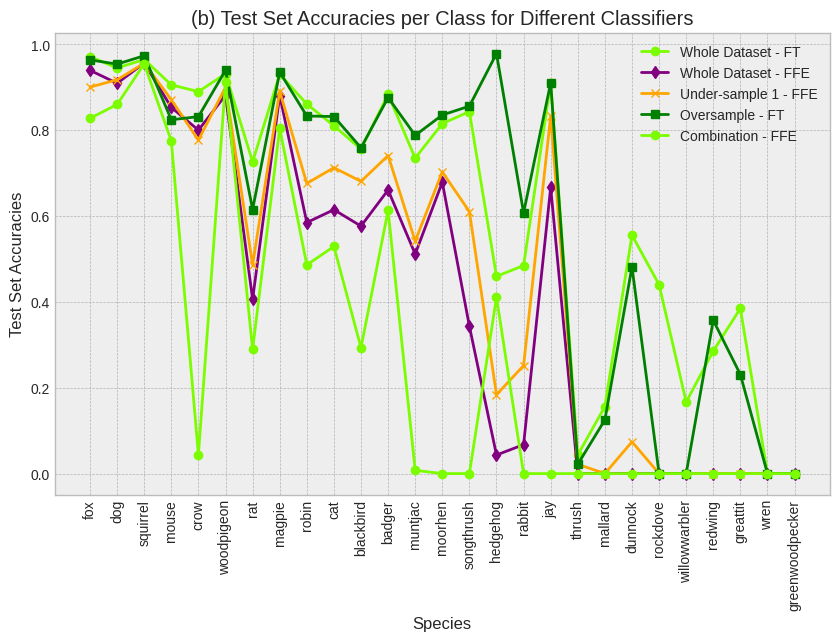

In [45]:
labels = list(acc_dicts[0].keys())  # Assuming all dictionaries have the same keys

# Create a color map with four distinct colors
colors = ['lawngreen', 'purple', 'orange', 'green', 'red']

# Create a list of four unique markers
markers = ['o', 'd', 'x', 's', 'd']

# Plot with unique lines, colors, and markers
plt.figure(figsize=(10, 6))

for i, acc_dict in enumerate(acc_dicts):
    # Get the F1 scores for the current dictionary
    acc_scores = list(acc_dict.values())

    # Plot the line with a unique marker and color (using modulo to cycle through 4 distinct elements)
    plt.plot(labels, acc_scores, label=f'{classifiers_list_plot[i]}', color=colors[i % 4], marker=markers[i % 4])

# Customize the plot
plt.style.use('bmh')
plt.xlabel('Species')
plt.ylabel('Test Set Accuracies')
plt.title('(b) Test Set Accuracies per Class for Different Classifiers')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend(loc='upper right')  # Position the legend in the upper right corner
plt.show()

**combined**

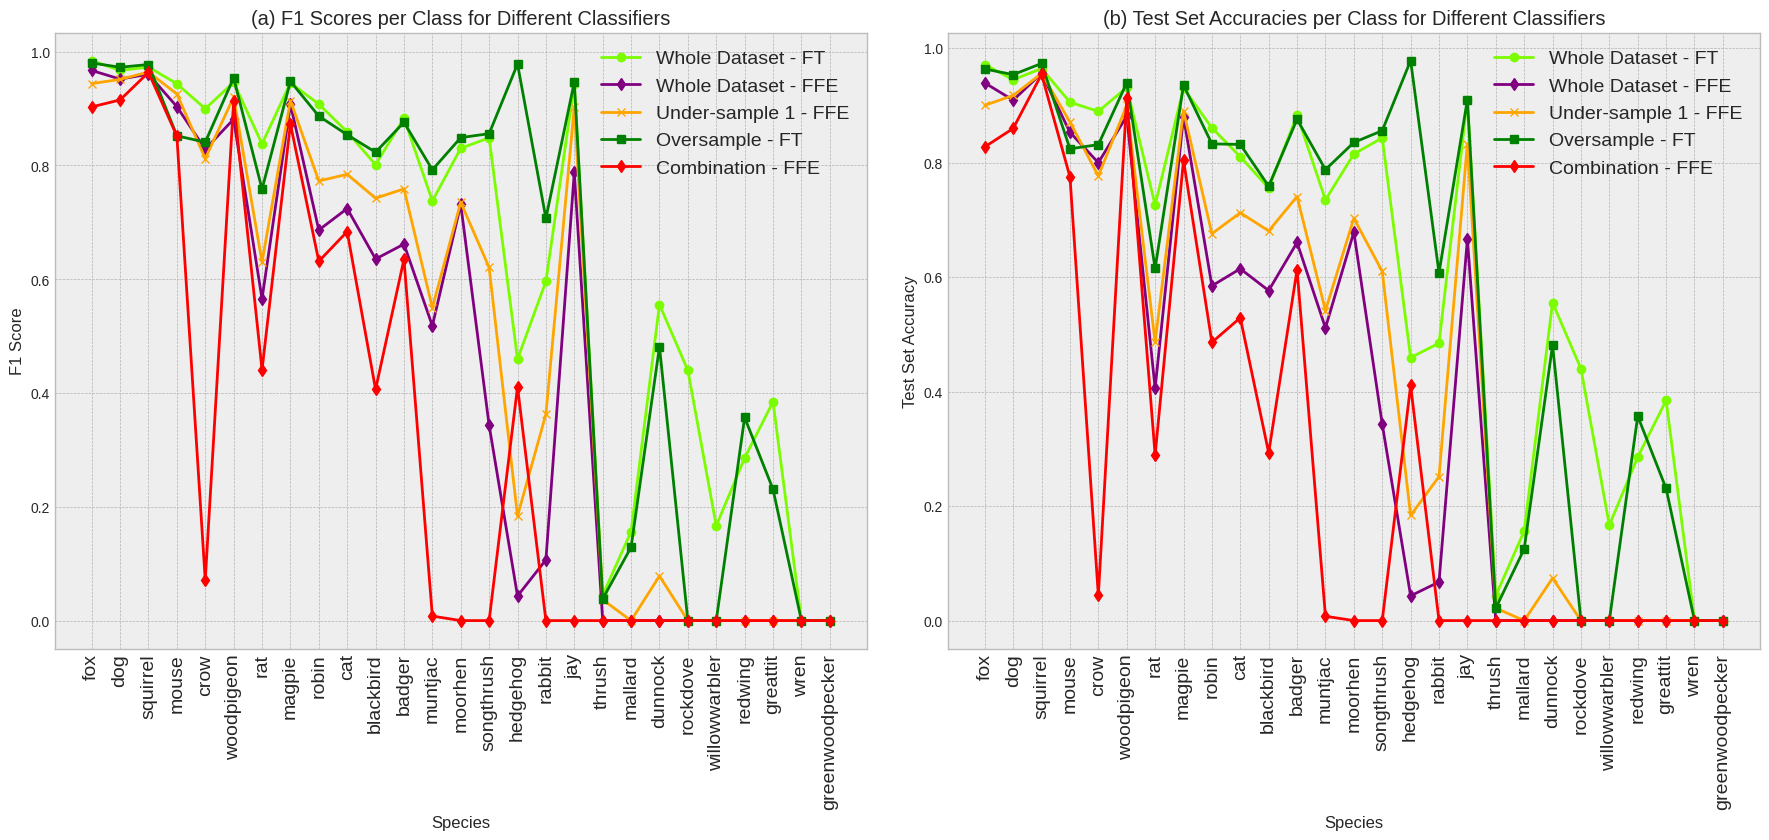

In [46]:
plt.figure(figsize=(22, 8))  # Larger figure to accommodate two subplots
plt.subplots_adjust(wspace=0.1)
fontsize = 14
# Subplot 1: F1 scores per class for different classifiers
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
for i, f1_dict in enumerate(f1_dicts):
    f1_scores = list(f1_dict.values())
    plt.plot(labels, f1_scores, label=f'{classifiers_list_plot[i]}', color=colors[i % 5], marker=markers[i % 5])

plt.xlabel('Species')
plt.ylabel('F1 Score')
plt.title('(a) F1 Scores per Class for Different Classifiers')
plt.xticks(rotation=90, fontsize=fontsize)
plt.legend(loc='upper right', fontsize=fontsize)

# Subplot 2: Test set accuracies per class for different classifiers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
for i, acc_dict in enumerate(acc_dicts):
    acc_scores = list(acc_dict.values())
    plt.plot(labels, acc_scores, label=f'{classifiers_list_plot[i]}', color=colors[i % 5], marker=markers[i % 5])

plt.xlabel('Species')
plt.ylabel('Test Set Accuracy')
plt.title('(b) Test Set Accuracies per Class for Different Classifiers')
plt.xticks(rotation=90, fontsize=fontsize)
plt.legend(loc='upper right', fontsize=fontsize)
plt.savefig('/content/drive/MyDrive/Project/Report Plots/MultiClassifier_f1_TSA_final.png',bbox_inches = 'tight' )
# Display the combined figure
plt.show()

#New per species F-1 and test acc plots (comparative)

**fine tuning**

In [62]:
f1_dicts_FT = [f1_scores_10b, f1_scores_14, f1_scores_17]

In [64]:
classifiers_list_FT = ['blank', 'OS - FT', 'US1 - FT']

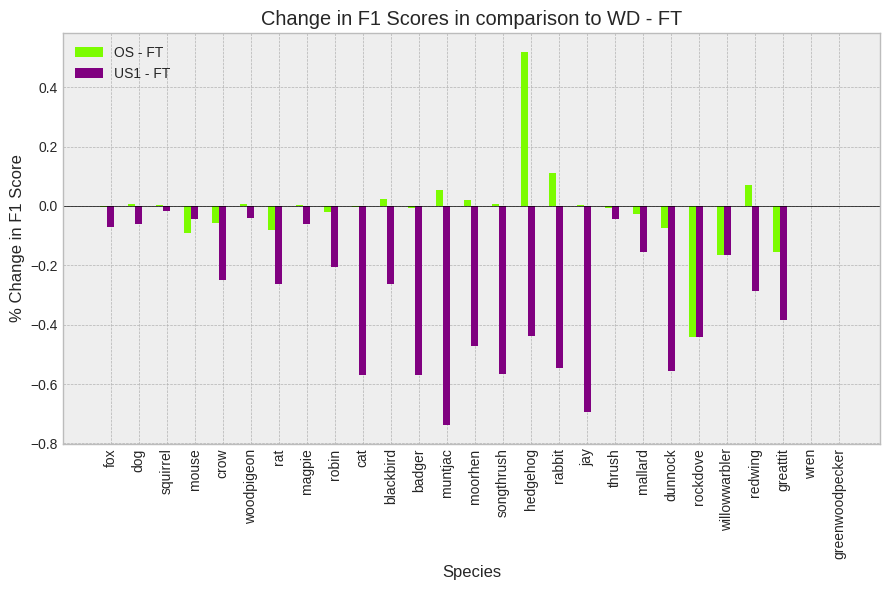

In [84]:
labels = list(f1_dicts_FT[0].keys())

# Set the baseline F1 scores
baseline_f1_scores = f1_dicts_FT[0]

# Calculate the change for each classifier compared to the baseline
score_changes = []
for f1_dict in f1_dicts_FT:
    changes = [(f1_dict[species] - baseline_f1_scores[species])  for species in labels]
    score_changes.append(changes)

# Plotting
colors = ['lawngreen', 'purple', 'orange']
bar_width = 0.25
index = np.arange(len(labels))

plt.figure(figsize=(9, 6))

for i in range(1, len(score_changes)):  # Start from index 1, excluding the baseline
  plt.bar(index + (i - 1) * bar_width, score_changes[i], bar_width,
          label=classifiers_list_FT[i], color=colors[i - 1])

# Customize the plot
plt.xlabel('Species')
plt.ylabel('% Change in F1 Score')
plt.title('Change in F1 Scores in comparison to WD - FT')
plt.xticks(index + bar_width, labels, rotation=90)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Fixed feature extractors**

In [68]:
f1_dicts_FFE = [f1_scores_8b, f1_scores_12, f1_scores_9, f1_scores_16]

classifiers_list_FFE = ['base', 'US1 - FFE', 'OS - FFE', 'COMB - FFE']

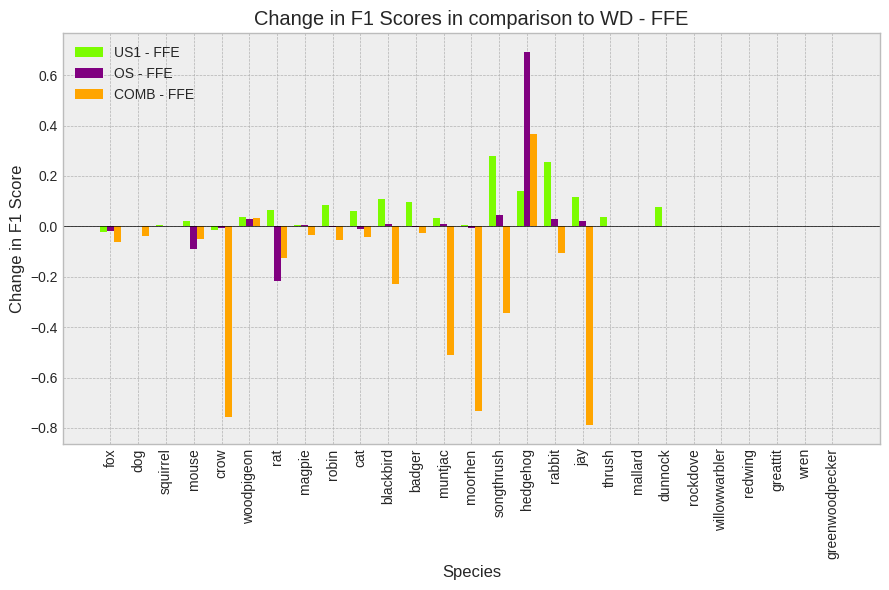

In [85]:
labels = list(f1_dicts_FFE[0].keys())

# Set the baseline F1 scores
baseline_f1_scores = f1_dicts_FFE[0]

# Calculate the percentage change for each classifier compared to the baseline
score_changes = []
for f1_dict in f1_dicts_FFE:
    changes = [(f1_dict[species] - baseline_f1_scores[species])  for species in labels]
    score_changes.append(changes)

# Plotting
colors = ['lawngreen', 'purple', 'orange', 'teal']
bar_width = 0.25
index = np.arange(len(labels))

plt.figure(figsize=(9, 6))

for i in range(1, len(score_changes)):  # Start from index 1, excluding the baseline
  plt.bar(index + (i - 1) * bar_width, score_changes[i], bar_width,
          label=classifiers_list_FFE[i], color=colors[i - 1])

# Customize the plot
plt.xlabel('Species')
plt.ylabel('Change in F1 Score')
plt.title('Change in F1 Scores in comparison to WD - FFE')
plt.xticks(index + bar_width, labels, rotation=90)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**combined**

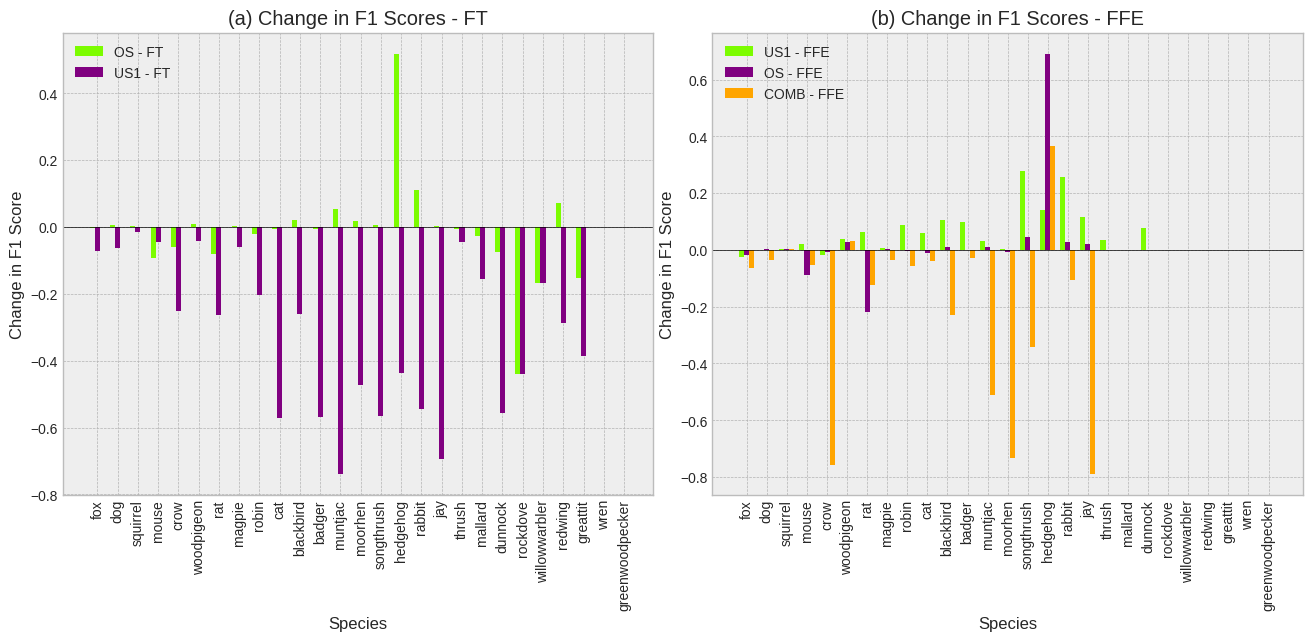

In [97]:
# Helper function to plot bar chart
def plot_change_bar_chart(f1_dicts, classifiers_list, title, ax, colors):
    labels = list(f1_dicts[0].keys())
    baseline_f1_scores = f1_dicts[0]

    score_changes = []
    for f1_dict in f1_dicts:
        changes = [(f1_dict[species] - baseline_f1_scores[species]) for species in labels]
        score_changes.append(changes)

    index = np.arange(len(labels))
    bar_width = 0.25

    for i in range(1, len(score_changes)):  # Start from index 1, excluding the baseline
        ax.bar(index + (i - 1) * bar_width, score_changes[i], bar_width,
               label=classifiers_list[i], color=colors[i - 1])

    ax.set_xlabel('Species')
    ax.set_ylabel('Change in F1 Score')
    ax.set_title(title)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(labels, rotation=90)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.legend(loc='upper left')

# Colors for the bars
colors_FT = ['lawngreen', 'purple', 'orange']
colors_FFE = ['lawngreen', 'purple', 'orange', 'teal']

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
plt.subplots_adjust(wspace=0.1)

# Plot for the first bar chart
plot_change_bar_chart(f1_dicts_FT, classifiers_list_FT, '(a) Change in F1 Scores - FT', axes[0], colors_FT)

# Plot for the second bar chart
plot_change_bar_chart(f1_dicts_FFE, classifiers_list_FFE, '(b) Change in F1 Scores - FFE', axes[1], colors_FFE)

# Display the figure
plt.savefig('/content/drive/MyDrive/Project/Report Plots/F1_compare_bar.png',bbox_inches = 'tight' )
plt.show()

#Comparison of training, validation, and test accuracies for each classifier

In [ ]:
train_val_test_8b = max_train_val_test('8b')

In [ ]:
train_val_test_9 = max_train_val_test('9')

In [ ]:
train_val_test_10b = max_train_val_test('10b')

In [ ]:
train_val_test_11 = max_train_val_test('11')

In [ ]:
train_val_test_12 = max_train_val_test('12')

In [ ]:
train_val_test_13 = max_train_val_test('13')

In [ ]:
train_val_test_14 = max_train_val_test('14')

In [ ]:
train_val_test_15 = max_train_val_test('15')

In [ ]:
train_val_test_16 = max_train_val_test('16')

In [ ]:
train_val_test_17 = max_train_val_test('17')

In [ ]:
classifier_accuracies = [
    train_val_test_8b,
    train_val_test_9,
    train_val_test_10b,
    train_val_test_11,
    train_val_test_12,
    train_val_test_13,
    train_val_test_14,
    train_val_test_16,
    train_val_test_17
]

In [ ]:
classifier_names = [
    'WD - FFE',
    'OS - FFE',
    'WD - FT',
    'US-2 - FFE',
    'US-1 - FFE',
    'US-3 - FFE',
    'OS - FT',
    'COMB - FFE',
    'US-1 - FT'
]

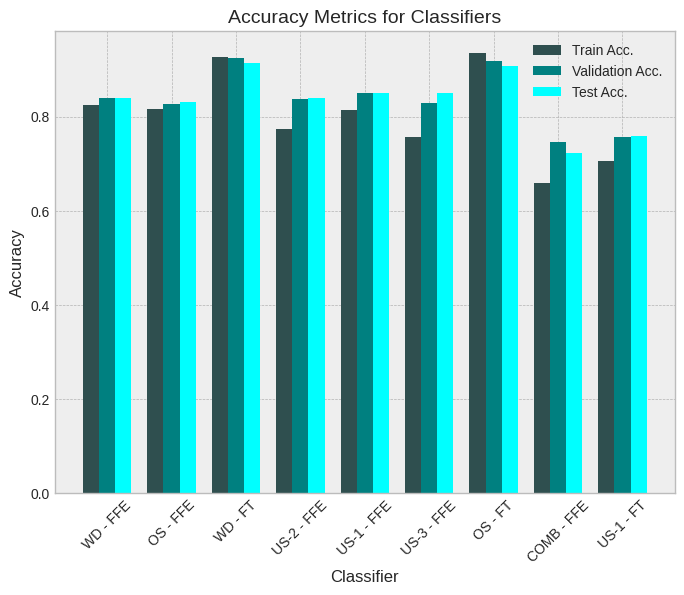

In [ ]:
plt.style.use('bmh')

# Metrics for the bars
train_accuracies = [d['train_max'] for d in classifier_accuracies]
val_accuracies = [d['val_max'] for d in classifier_accuracies]
test_accuracies = [d['test_acc'] for d in classifier_accuracies]

# Define the position for the bars
n_classifiers = len(classifier_names)
index = np.arange(n_classifiers)  # Positions for each group of bars
bar_width = 0.25  # Width of each bar

# Create the plot
plt.figure(figsize=(8, 6))

# Create bars for each accuracy metric for each classifier
plt.bar(index, train_accuracies, bar_width, label='Train Acc.', color='darkslategrey')  # Train accuracy
plt.bar(index + bar_width, val_accuracies, bar_width, label='Validation Acc.', color='teal')  # Validation accuracy
plt.bar(index + 2 * bar_width, test_accuracies, bar_width, label='Test Acc.', color='cyan')  # Test accuracy

# Customize the plot
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Metrics for Classifiers', fontsize=14)
plt.xticks(index + bar_width, classifier_names, rotation=45, fontsize=10)  # Rotate x-axis labels for clarity
plt.legend()  # Add a legend for the different accuracy metrics

# Show the plot
plt.show()

#Comparison of image numbers and test accuracy

In [ ]:
new_all_data_df = pd.read_csv('/content/drive/MyDrive/Project/new_all_data.csv')

In [ ]:
species_counts = {}

for index, row in new_all_data_df.iterrows():
    species = row['Subject']
    if species in species_counts:
      species_counts[species] += 1
    else:
      species_counts[species] = 1

total_count = 0

for species, count in species_counts.items():
  print(f'{species} : {count}')
  total_count += count

print(total_count)

mouse : 5022
squirrel : 23251
fox : 31114
robin : 2271
dog : 19261
magpie : 2848
cat : 2713
crow : 2436
rat : 4094
thrush : 409
woodpigeon : 4007
songthrush : 1160
jay : 743
moorhen : 976
rockdove : 149
badger : 1497
muntjac : 1178
blackbird : 1844
rabbit : 778
redwing : 143
hedgehog : 1113
willowwarbler : 140
dunnock : 272
wren : 108
greattit : 122
greenwoodpecker : 32
mallard : 118
107799


In [ ]:
rows = []

# Loop through the species_counts dictionary to create rows
for species, count in species_counts.items():
    # Create a dictionary for each row
    row = {
        'count': count,
        'species': species,
        'test_acc': accuracy_scores_10b[species]
    }
    # Append the dictionary to the list of rows
    rows.append(row)

# Create a DataFrame from the list of dictionaries
test_acc_count_df = pd.DataFrame(rows)

# Display the first few rows of the DataFrame
test_acc_count_df.head()

,count,species,test_acc
0,5022,mouse,0.905620
1,23251,squirrel,0.964511
2,31114,fox,0.971372
3,2271,robin,0.860759
4,19261,dog,0.944950


In [ ]:
undersample1_df = pd.read_csv('/content/drive/MyDrive/Project/undersample1.csv')

species_counts2 = {}

for index, row in undersample1_df.iterrows():
    species = row['Subject']
    if species in species_counts2:
      species_counts2[species] += 1
    else:
      species_counts2[species] = 1

rows = []

# Loop through the species_counts dictionary to create rows
for species, count in species_counts2.items():
    # Create a dictionary for each row
    row = {
        'count': count,
        'species': species,
        'test_acc': accuracy_scores_12[species]
    }
    # Append the dictionary to the list of rows
    rows.append(row)

# Create a DataFrame from the list of dictionaries
test_acc_count_df2 = pd.DataFrame(rows)

# Display the first few rows of the DataFrame
test_acc_count_df2.head()

,count,species,test_acc
0,20275,fox,0.900296
1,18077,squirrel,0.955872
2,17631,dog,0.917425
3,5022,mouse,0.871037
4,4094,rat,0.485955


In [ ]:
undersample3_df = pd.read_csv('/content/drive/MyDrive/Project/undersample3.csv')

species_counts3 = {}

for index, row in undersample3_df.iterrows():
    species = row['Subject']
    if species in species_counts3:
      species_counts3[species] += 1
    else:
      species_counts3[species] = 1

rows = []

# Loop through the species_counts dictionary to create rows
for species, count in species_counts3.items():
    # Create a dictionary for each row
    row = {
        'count': count,
        'species': species,
        'test_acc': accuracy_scores_13[species]
    }
    # Append the dictionary to the list of rows
    rows.append(row)

# Create a DataFrame from the list of dictionaries
test_acc_count_df3 = pd.DataFrame(rows)

# Display the first few rows of the DataFrame
test_acc_count_df3.head()

,count,species,test_acc
0,13275,fox,0.900296
1,11077,squirrel,0.955872
2,10631,dog,0.917425
3,5022,mouse,0.871037
4,4094,rat,0.485955


**combined plot**

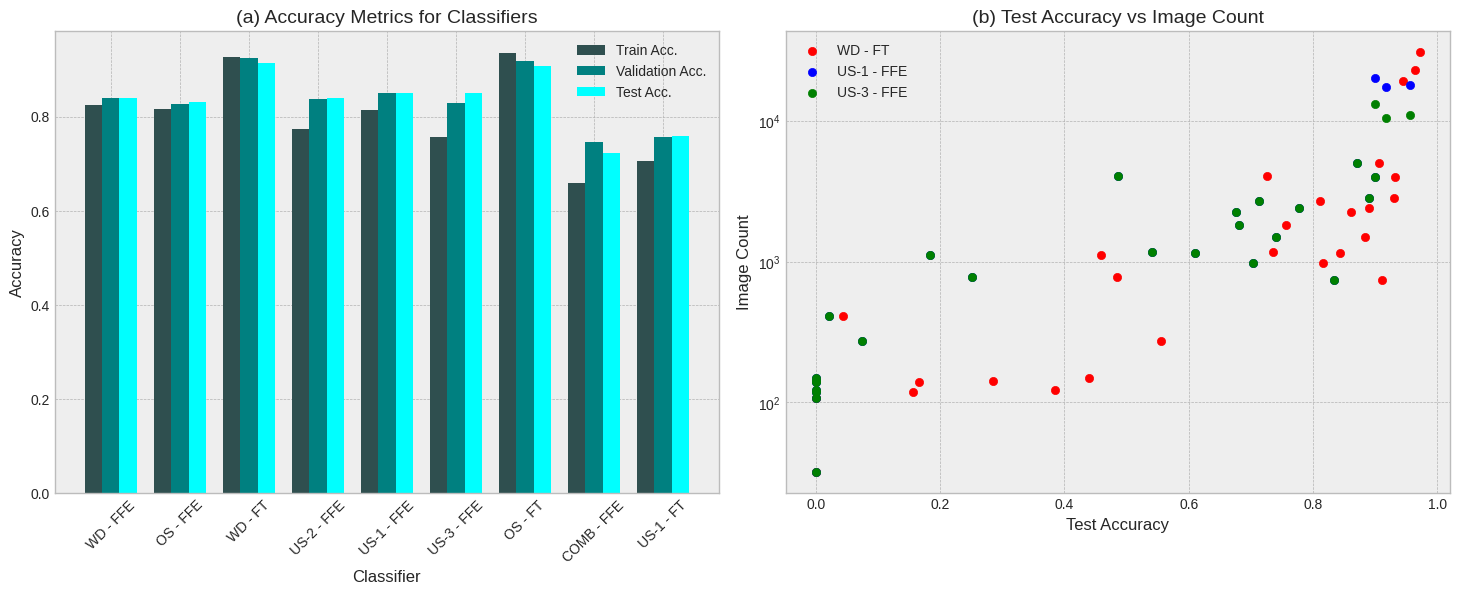

In [ ]:
plt.figure(figsize=(18, 6))  # Larger canvas to accommodate two subplots

# Adjust spacing to avoid overlap
plt.subplots_adjust(wspace=0.1)  # Space between subplots

# Subplot 1: Bar chart for accuracy metrics
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.style.use('bmh')

n_classifiers = len(classifier_names)
index = np.arange(n_classifiers)
bar_width = 0.25

plt.bar(index, train_accuracies, bar_width, label='Train Acc.', color='darkslategrey')
plt.bar(index + bar_width, val_accuracies, bar_width, label='Validation Acc.', color='teal')
plt.bar(index + 2 * bar_width, test_accuracies, bar_width, label='Test Acc.', color='cyan')

plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('(a) Accuracy Metrics for Classifiers', fontsize=14)
plt.xticks(index + bar_width, classifier_names, rotation=45, fontsize=10)
plt.legend()  # Display legend for the bars

# Subplot 2: Scatter plot for test accuracy vs image count
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot

plt.scatter(test_acc_count_df['test_acc'], test_acc_count_df['count'], color='r', alpha=1, s=35, label='WD - FT')
plt.scatter(test_acc_count_df2['test_acc'], test_acc_count_df2['count'], color='b', alpha=1, s=35, label='US-1 - FFE')
plt.scatter(test_acc_count_df3['test_acc'], test_acc_count_df3['count'], color='g', alpha=1, s=35, label='US-3 - FFE')

plt.xlabel('Test Accuracy', fontsize=12)
plt.ylabel('Image Count', fontsize=12)
plt.title('(b) Test Accuracy vs Image Count', fontsize=14)
plt.yscale('log')  # Logarithmic scale for y-axis to handle varying image counts
plt.legend()
plt.savefig('/content/drive/MyDrive/Project/Report Plots/Acc_Test_im_count_comboplot.png',bbox_inches = 'tight' )

# Display the combined figure
plt.show()

#Whole dataset stuff

Overall Accuracy for Classifier 8b 0.840


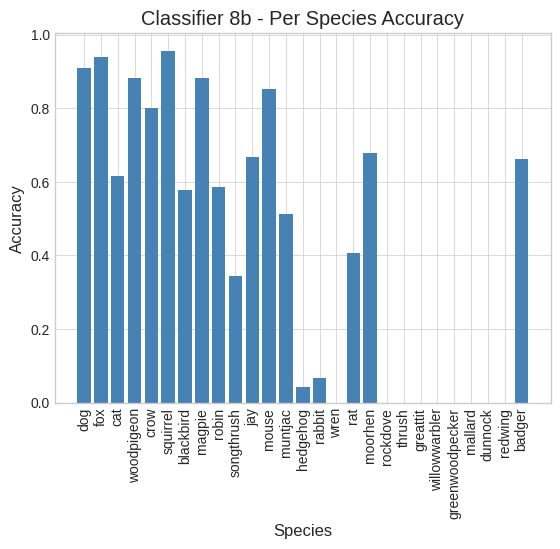

In [125]:
# Load the data for the given classifier
data_path = f'/content/drive/MyDrive/Project/test_pred_conf_classifier8b.csv'
test_data = pd.read_csv(data_path)

    # Calculate overall accuracy
overall_accuracy = accuracy_score(test_data['predicted_class'], test_data['target_class'])
print(f'Overall Accuracy for Classifier 8b {overall_accuracy:.3f}')

# Calculate accuracy for each species
species_accuracy = {}
species_names = test_data['target_class'].unique()
for species in species_names:
    species_df = test_data[test_data['target_class'] == species]
    accuracy = accuracy_score(species_df['target_class'], species_df['predicted_class'])
    species_accuracy[species] = accuracy

    # Plot bar chart showing accuracy for each species
plt.bar(list(species_accuracy.keys()), list(species_accuracy.values()), color='steelblue')
plt.xlabel('Species')
plt.ylabel('Accuracy')
plt.title(f'Classifier 8b - Per Species Accuracy')
plt.xticks(rotation=90)
plt.show()

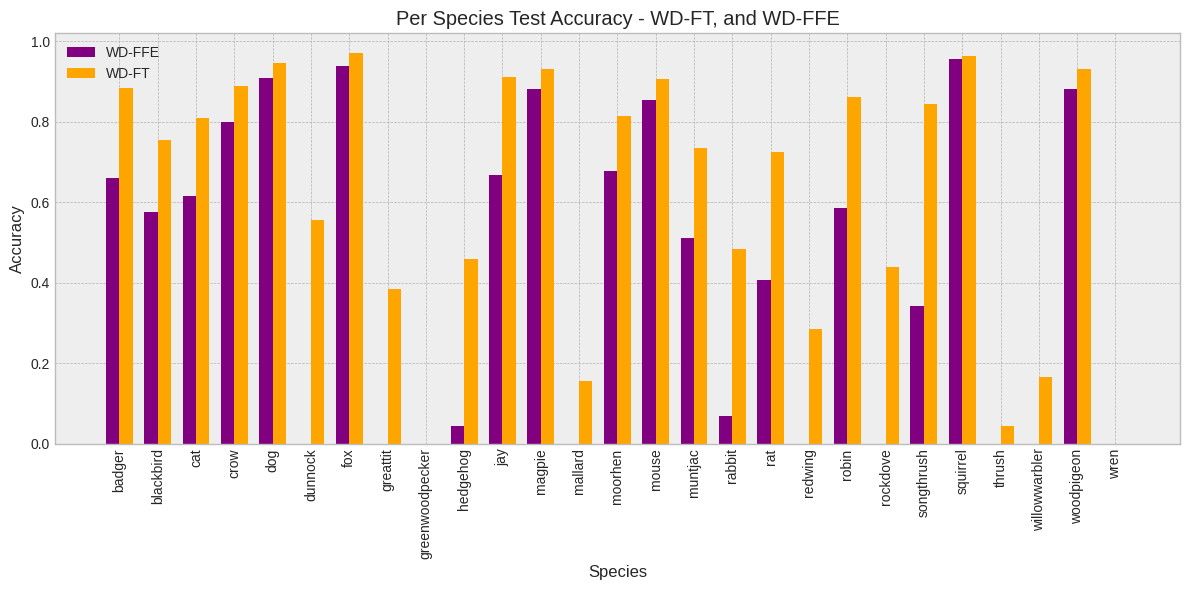

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

def calculate_accuracies(data_path):
    # Load the data
    test_data = pd.read_csv(data_path)
    overall_accuracy = accuracy_score(test_data['predicted_class'], test_data['target_class'])
    species_accuracy = {}
    species_names = test_data['target_class'].unique()
    for species in species_names:
        species_df = test_data[test_data['target_class'] == species]
        accuracy = accuracy_score(species_df['target_class'], species_df['predicted_class'])
        species_accuracy[species] = accuracy
    return overall_accuracy, species_accuracy

# Paths to the data files for classifier 8b and 10b
data_path_8b = '/content/drive/MyDrive/Project/test_pred_conf_classifier8b.csv'
data_path_10b = '/content/drive/MyDrive/Project/test_pred_conf_classifier10b.csv'

# Calculate accuracies for both classifiers
overall_accuracy_8b, species_accuracy_8b = calculate_accuracies(data_path_8b)
overall_accuracy_10b, species_accuracy_10b = calculate_accuracies(data_path_10b)

# Get unique species from both classifiers
all_species = set(species_accuracy_8b.keys()).union(species_accuracy_10b.keys())

# Prepare data for plotting
labels = sorted(all_species)
accuracy_8b = [species_accuracy_8b.get(species, 0) for species in labels]
accuracy_10b = [species_accuracy_10b.get(species, 0) for species in labels]

# Define the position for the bars
index = np.arange(len(labels))
bar_width = 0.35

# Plotting
plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.bar(index, accuracy_8b, bar_width, label='WD-FFE', color='purple')
plt.bar(index + bar_width, accuracy_10b, bar_width, label='WD-FT', color='orange')

# Customize the plot
plt.xlabel('Species')
plt.ylabel('Accuracy')
plt.title('Per Species Test Accuracy - WD-FT, and WD-FFE')
plt.xticks(index + bar_width / 2, labels, rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Project/Report Plots/test_acc_WD_bar.png',bbox_inches = 'tight' )
plt.show()


**Species Composition**